In [2]:
import equinox as eqx
# from hypermagnetics.models.hyper_fourier import FourierModel
from hypermagnetics.models.hyper_mlp import HyperLayer

config = {
    "width": 400,
    "depth": 3,
    "hwidth": 2,
    "hdepth": 3,
    "seed": 42
}

model_orig = HyperLayer(
    width=config["width"],
    depth=config["depth"],
    hwidth=config["hwidth"],
    hdepth=config["hdepth"],
    seed=config["seed"],
)

filename = "/home/spol/Documents/repos/hypermagnetics/models/ic_inr_400_hwidth_2_50k_fcinr_lim_uniform.eqx"
model = eqx.tree_deserialise_leaves(filename, model_orig)

In [3]:
from hypermagnetics import plots
from hypermagnetics.sources import configure
from hypermagnetics.measures import loss, accuracy, accuracy_field

source_config = {
    "shape": "prism",
    "n_samples": 1,
    "lim": 1.2,
    "res": 100,
    "dim": 3,
    "save_data": False,
}
val = configure(**source_config, n_sources=10, seed=101)
print(loss(model, val), accuracy(model, val), accuracy_field(model, val))

0.12541455 5.392012 19.711273


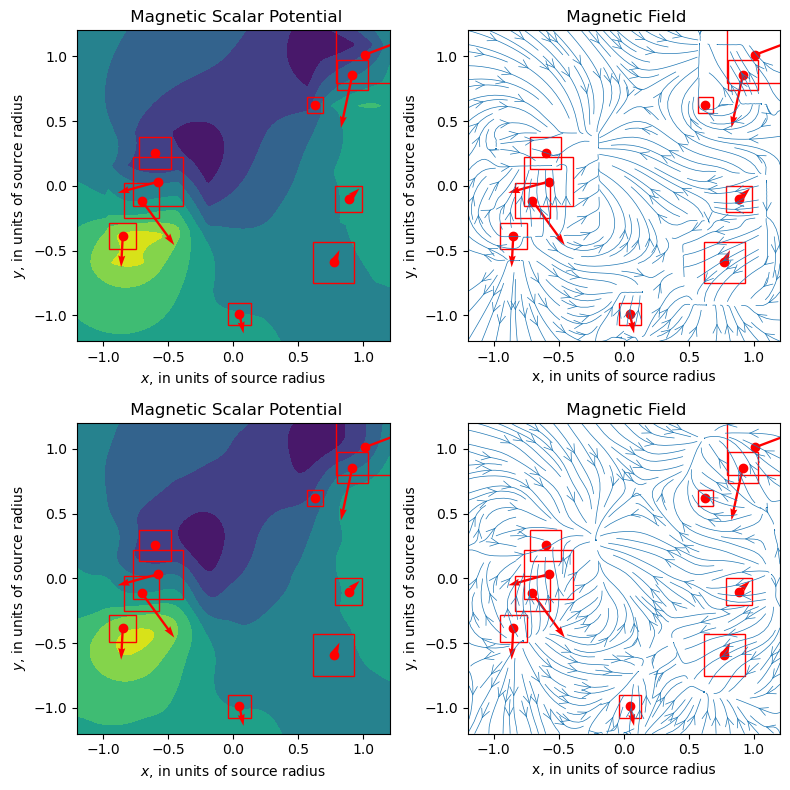

In [4]:
plots(val, idx=0, model=model)

Number of sources: 116


Potential Acc.: 12.072196006774902, Field Acc.: 42.13267517089844


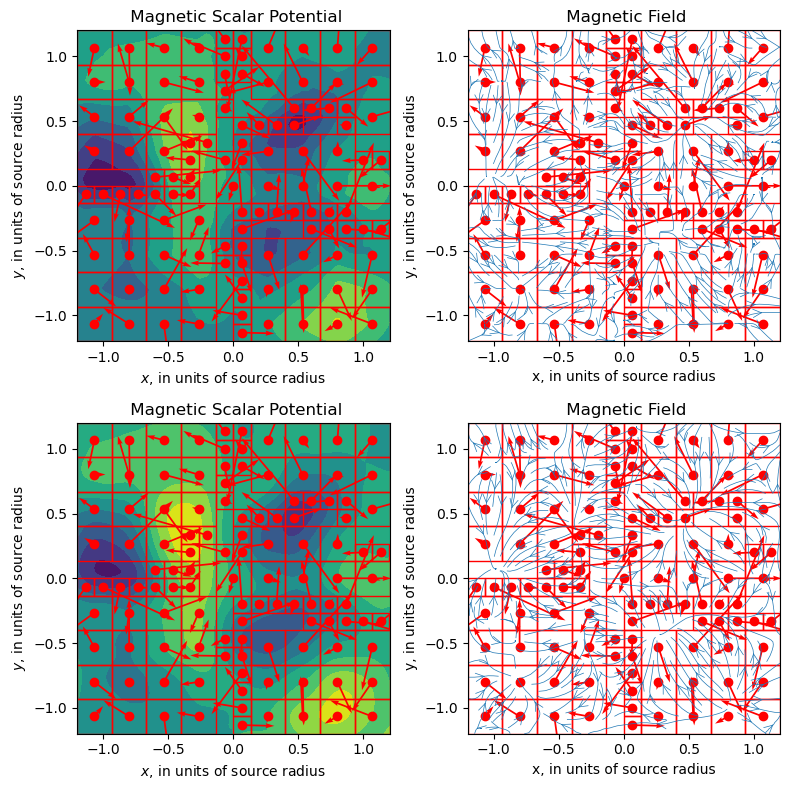

Number of sources: 97
Potential Acc.: 12.55825138092041, Field Acc.: 41.254974365234375


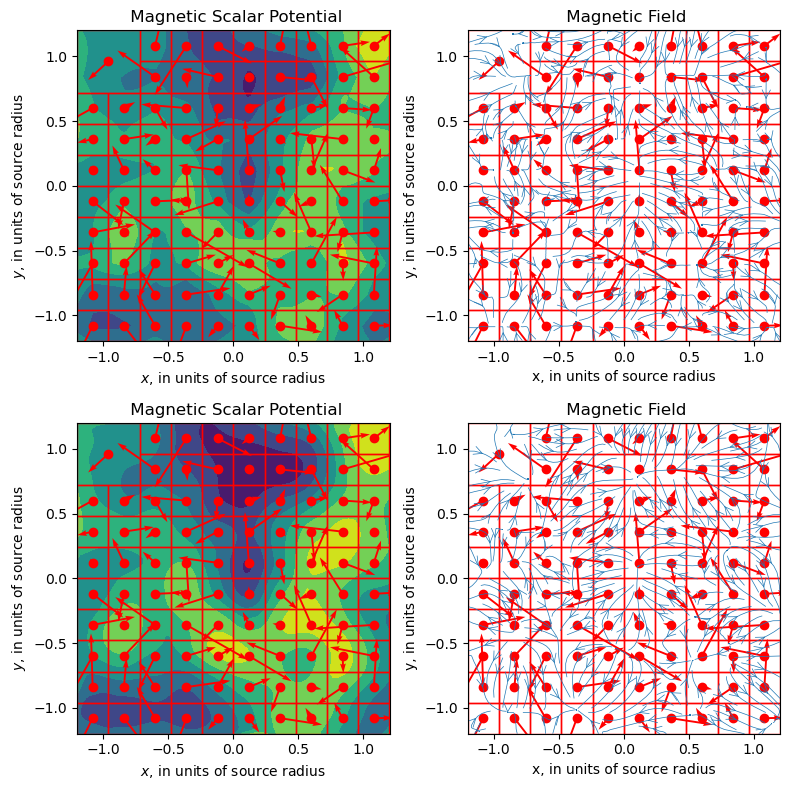

Number of sources: 112
Potential Acc.: 8.214031219482422, Field Acc.: 37.79515075683594


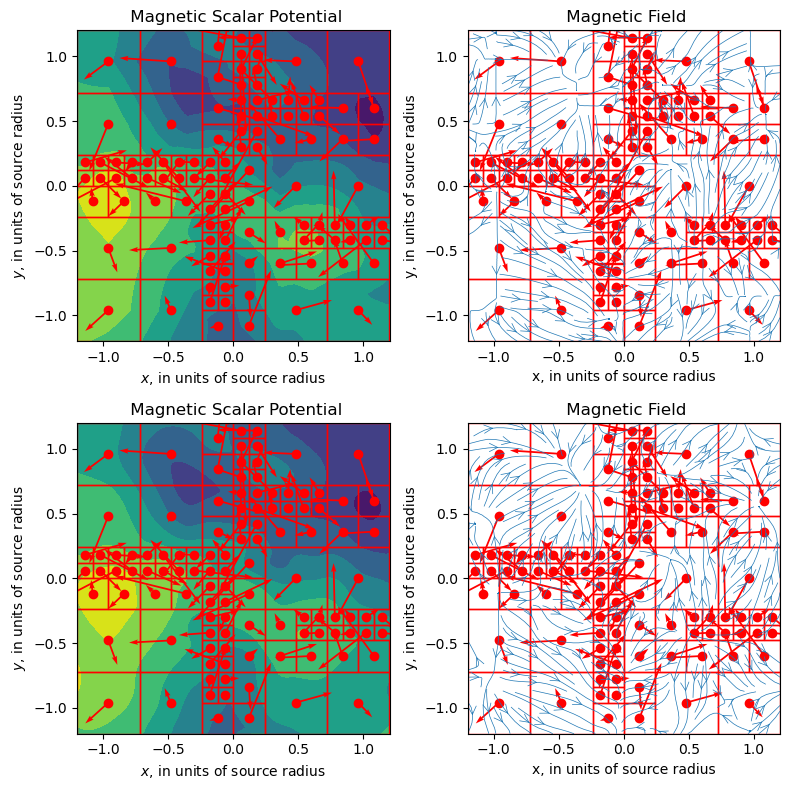

Number of sources: 73
Potential Acc.: 6.026139259338379, Field Acc.: 32.807945251464844


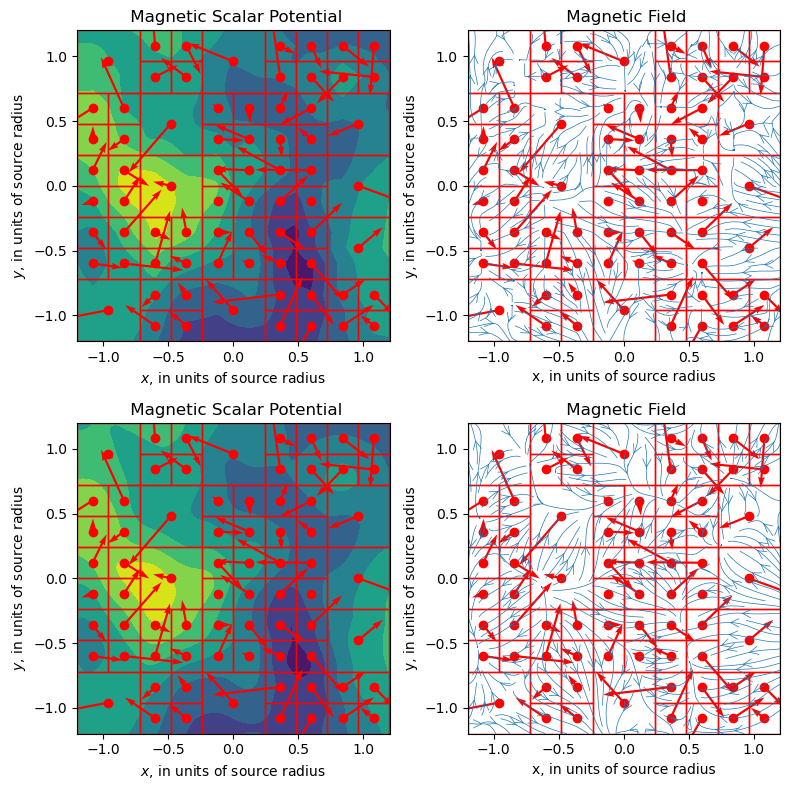

Number of sources: 49
Potential Acc.: 12.900564193725586, Field Acc.: 40.46845245361328


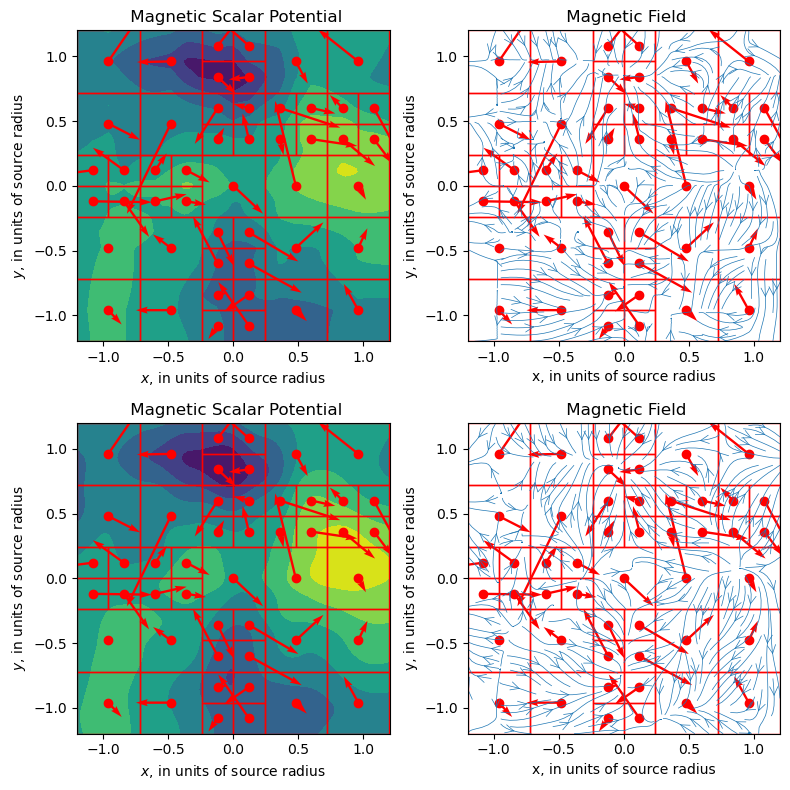

Number of sources: 201
Potential Acc.: 16.127283096313477, Field Acc.: 49.92779541015625


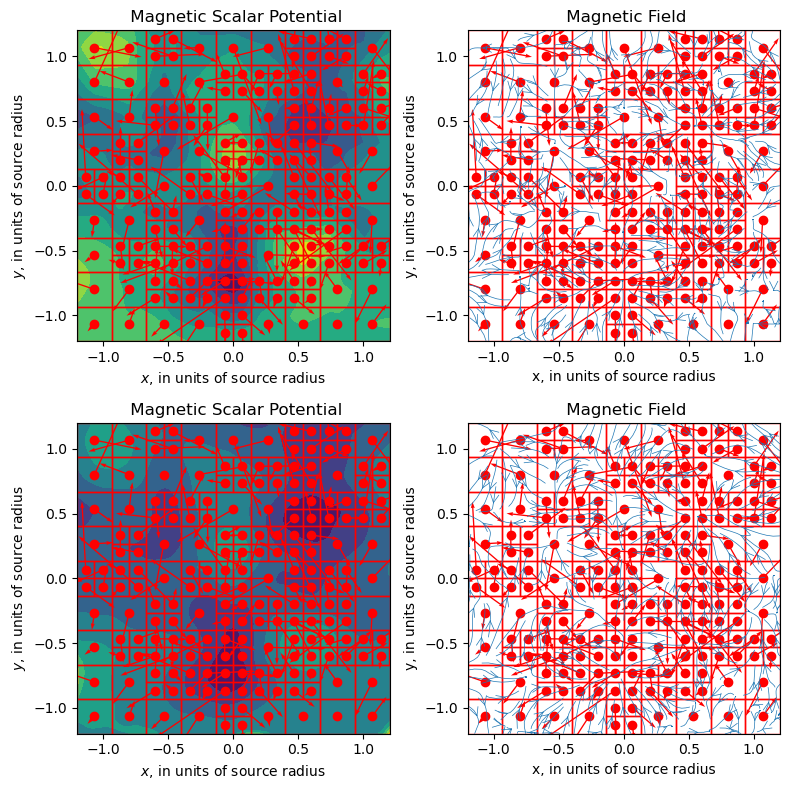

Number of sources: 142
Potential Acc.: 13.096559524536133, Field Acc.: 44.507301330566406


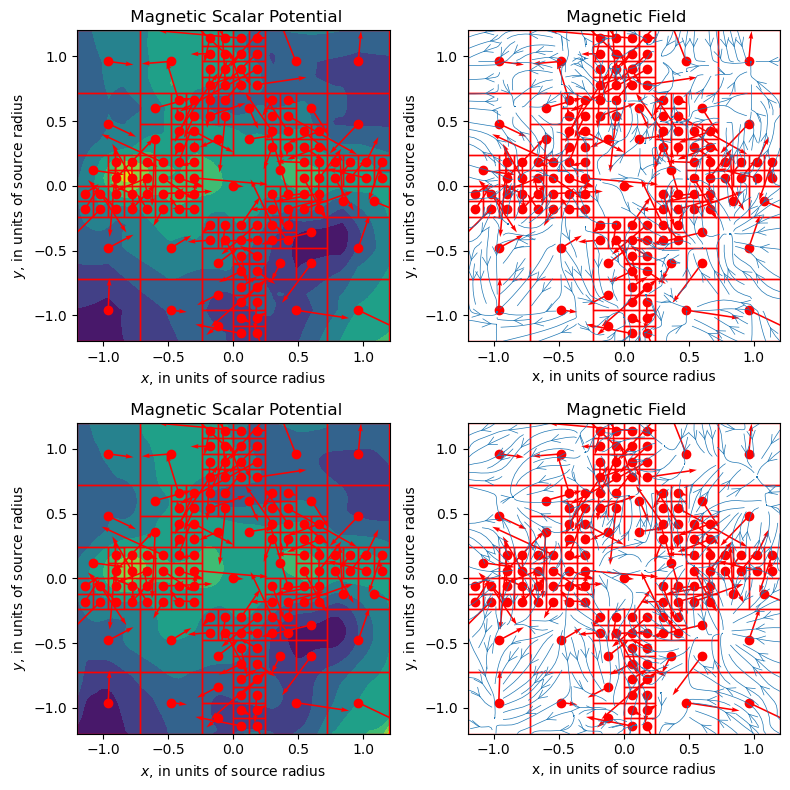

Number of sources: 67
Potential Acc.: 5.975351333618164, Field Acc.: 31.36746597290039


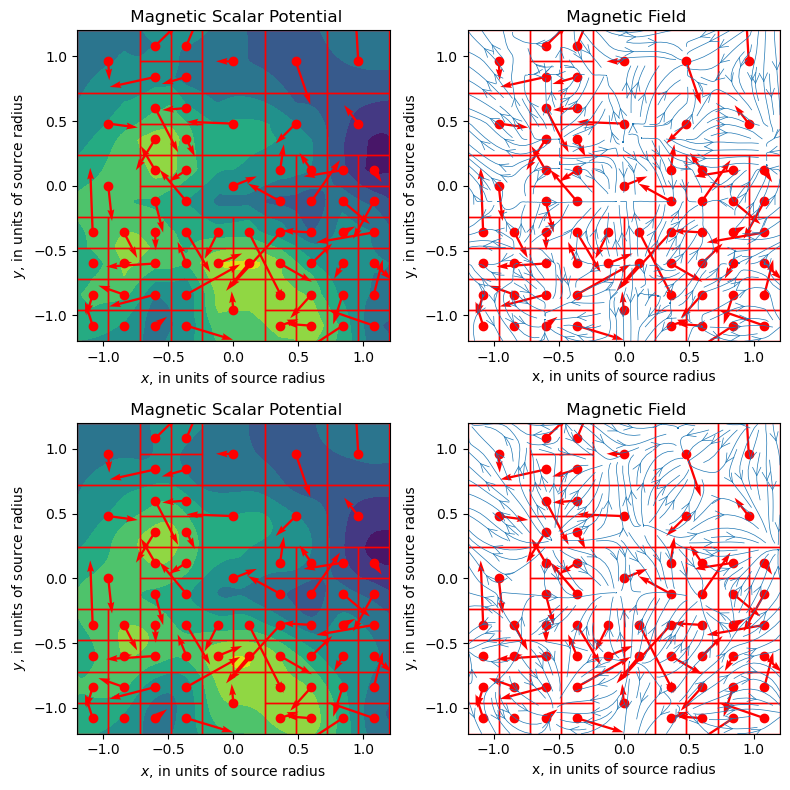

Number of sources: 52
Potential Acc.: 6.6931633949279785, Field Acc.: 33.14239501953125


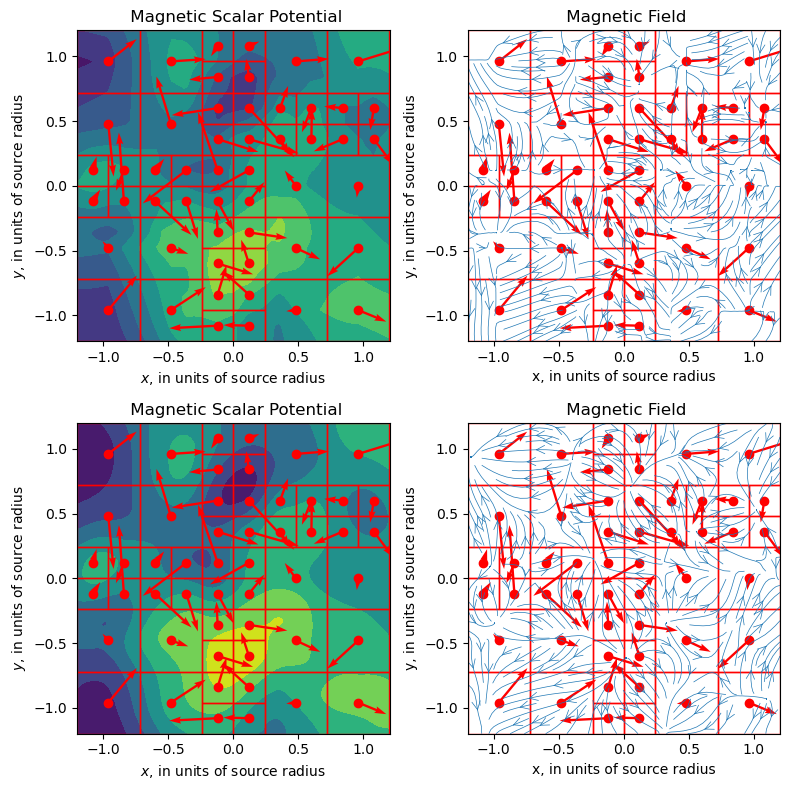

Number of sources: 78
Potential Acc.: 6.303386211395264, Field Acc.: 32.85930633544922


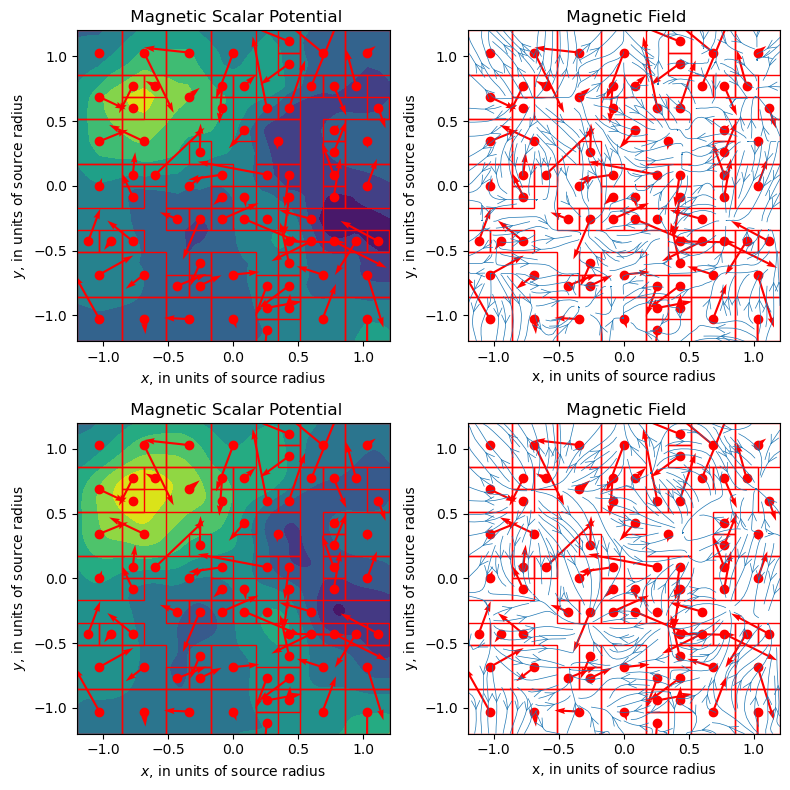

In [5]:
# Shape from Rasmus with minimum size of 0.25
from hypermagnetics.sources import configure, read_db
from hypermagnetics import plots

for file_idx in range(10):
    test = read_db(f"squares_1_{file_idx}.h5")
    print("Number of sources: " + str(test["sources"][:].shape[1]))
    print(f"Potential Acc.: {accuracy(model, test)}, Field Acc.: {accuracy_field(model, test)}")
    plots(test, idx=0, model=model)

In [6]:
from hypermagnetics.sources import configure, read_db
test_idx = 0
test = read_db(f"squares_1_{test_idx}.h5")

In [7]:
import jax
import jax.numpy as jnp

mr = test["sources"][0 :1]
m, r0, size = jnp.split(mr, 3, axis=-1)
grid = test["grid"]

res = int(jnp.sqrt(len(grid)))
N = len(mr)
field_model = jax.vmap(model.field, in_axes=(0, None))(mr, test["grid"])

In [8]:
from hypermagnetics.sources import _field_mt

field_mt, _ = _field_mt(test["sources"], test["grid"], "prism")

In [9]:
sources, r, target = test["sources"], test["r"], test["field_grid"]
diff_mt = target[..., :2] - field_mt[..., :2] * jnp.pi**2
diff_model = target[..., :2] - field_model[..., :2]

for diff in [diff_mt, diff_model]:
    acc = jnp.linalg.norm(diff, axis=-1) / jnp.linalg.norm(target[..., :2], axis=-1) * 100
    # acc = replace_inf_nan(acc)
    print(jnp.median(acc))

0.00021195042
42.189484
